<a href="https://colab.research.google.com/github/marquesgabi/Doutorado/blob/master/PSD_histogram_ANN_r_squared_AM_8_set_9_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7 MB 4.7 MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 443, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (192/192), done.
remote: Total 443 (delta 88), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (443/443), 165.85 MiB | 30.74 MiB/s, done.
Resolving deltas: 100% (211/211), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[9] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 22.84 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [9]:
df=Segmenta(img)
Img_Size = 28

In [10]:
print(df)

    Width           0           1  ...         781         782         783
0     135   58.875549   58.810150  ...    6.206200    2.624472    1.199726
1     137   79.889610   80.594704  ...   93.303909   91.565887   92.672806
2     118  105.454170  106.303360  ...   81.729965   84.274628   86.985336
3     147   98.587311   95.775520  ...   51.503399   51.394558   53.253967
4     111   87.968918   90.552795  ...   79.332443   79.644989   80.379669
5     105   50.075562   46.208897  ...   60.977783   54.960007   56.560005
6     195   73.237343   81.286797  ...    5.921026    7.278896    5.938830
7     117   80.285416   76.000656  ...   55.457886   57.947693   59.556576
8     142   50.430271   50.216423  ...   47.255505   45.246181   44.894661
9     141   56.466274   62.195969  ...   59.679596   66.809319   75.020668
10    193   41.658485   42.133720  ...   24.528175   21.347984   11.954334
11    185    0.523302    5.634769  ...    6.105858    5.509452    5.856333
12    120   66.983330   6

In [11]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [12]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 22.92 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [13]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [14]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [15]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = 'ANN without convolution '
N1 = 200
N2 = 10

# make the CNN
model = Sequential()
model.add(Flatten())
model.add(Dense(units=N1))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:

# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)


Epoch 1/200
11/11 [==============================] - 1s 25ms/step - loss: 0.6936 - accuracy: 0.5044 - val_loss: 0.6913 - val_accuracy: 0.5102
Epoch 2/200
11/11 [==============================] - 0s 8ms/step - loss: 0.6901 - accuracy: 0.6064 - val_loss: 0.6879 - val_accuracy: 0.6667
Epoch 3/200
11/11 [==============================] - 0s 7ms/step - loss: 0.6881 - accuracy: 0.6618 - val_loss: 0.6846 - val_accuracy: 0.7415
Epoch 4/200
11/11 [==============================] - 0s 6ms/step - loss: 0.6833 - accuracy: 0.6822 - val_loss: 0.6786 - val_accuracy: 0.7211
Epoch 5/200
11/11 [==============================] - 0s 5ms/step - loss: 0.6765 - accuracy: 0.6880 - val_loss: 0.6715 - val_accuracy: 0.7619
Epoch 6/200
11/11 [==============================] - 0s 5ms/step - loss: 0.6695 - accuracy: 0.6910 - val_loss: 0.6614 - val_accuracy: 0.7279
Epoch 7/200
11/11 [==============================] - 0s 7ms/step - loss: 0.6591 - accuracy: 0.7405 - val_loss: 0.6493 - val_accuracy: 0.7619
Epoch 8/200


In [17]:
Y_test = yback(Y_test)

In [18]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        70   2
1         3  72


In [19]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [20]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[9] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  #prediction = model.predict_classes(result)
  prediction = np.argmax(model.predict(result), axis=-1)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
3   192.0   74.573349   77.677505  ...  100.246094   55.891491   49.351994
4   137.0   40.407211   44.869568  ...   87.582230   86.839935   86.061630
5   139.0   88.045952   81.073753  ...   16.541586   16.514517   15.995704
7   158.0   75.679695   55.978371  ...    0.000000    0.000000    0.000000
8   142.0   54.219994   42.878597  ...   38.976395   23.533625   29.693117
10  178.0   71.768845   73.244919  ...    5.941801    6.765434    6.210454
11  136.0   81.518173   88.492218  ...   60.603806   60.918690   62.653114
13  117.0   54.607498   54.849152  ...   61.864128   61.483234   59.078678
14  191.0   25.335930   26.591705  ...   80.955132   82.034554   79.374306
15  192.0   17.044703   14.112846  ...   79.866753   85.597656   90.280380
19  157.0   62.032578   66.206055  ...   92.578247   88.909897   89.042397
20  169.0   79.714851   82.964813  ...    0.085291    0.000000    0.000000
22  155.0   59.089703   6

In [21]:
Width=np.array(Width_new)

In [22]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 687, done.
remote: Counting objects: 100% (448/448), done.
remote: Compressing objects: 100% (446/446), done.
remote: Total 687 (delta 282), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (687/687), 5.59 MiB | 12.29 MiB/s, done.
Resolving deltas: 100% (419/419), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [23]:
#!git clone https://github.com/ucfilho/marquesgabi_out_2020
!git clone https://github.com/marquesgabi/Doutorado

%cd Doutorado

PSD_imageJ = 'Amostra8.csv' 
PSD_new = pd.read_csv(PSD_imageJ,sep=';')
#encoding='utf8'
print(PSD_new.head(3))

Cloning into 'Doutorado'...
remote: Enumerating objects: 443, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (192/192), done.
remote: Total 443 (delta 88), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (443/443), 165.85 MiB | 28.85 MiB/s, done.
Resolving deltas: 100% (211/211), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/Doutorado
   Unnamed: 0   Area
0           1  0.807
1           2  1.407
2           3  1.177


In [24]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [25]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
3,192.0,74.573349,77.677505,78.432724,80.206589,77.560326,76.581154,72.816833,72.582893,72.168396,61.186630,48.788628,50.444008,51.877167,53.442707,74.922302,90.710503,95.646690,95.687927,94.633240,96.402336,97.397560,97.375427,97.554680,101.928810,104.666222,105.944000,109.572037,103.667099,77.820305,81.908852,81.564240,80.034714,80.736107,78.995216,79.277771,81.134537,87.720482,82.864143,57.186199,...,101.392792,102.793396,108.763443,103.886276,101.011276,102.930122,104.469612,108.322037,117.586800,124.422295,83.579422,44.856770,84.876297,88.116745,89.534721,94.628899,102.756065,113.047737,116.767365,102.876732,74.157982,57.010414,55.680119,56.575954,59.109810,59.630203,67.492180,93.402344,101.942703,102.261711,104.207893,102.151909,99.584198,100.338112,102.503899,107.407547,113.878021,100.246094,55.891491,49.351994
4,137.0,40.407211,44.869568,47.756832,51.005169,58.022163,62.836590,65.048477,67.477386,67.841064,69.317757,70.552185,69.833443,69.552025,67.638443,65.399857,62.957748,61.251102,63.193989,66.540520,74.065056,79.213867,79.746979,80.893066,80.037819,74.412491,70.811333,65.066544,62.484306,39.523094,45.059563,47.985188,50.451378,56.977356,62.982677,65.506264,68.275932,68.869148,68.822685,68.116570,...,90.634285,90.805954,92.154022,93.352486,94.625809,93.458893,89.694176,86.666100,86.966751,88.445145,88.303108,87.836388,82.281479,83.083969,83.809044,84.110817,86.836487,88.757324,87.914055,89.631897,90.083702,88.482010,87.776123,88.332993,87.319778,91.775528,93.274284,91.649796,88.196106,86.497253,89.256699,93.364639,94.041763,93.601364,93.198349,90.561340,88.847725,87.582230,86.839935,86.061630
5,139.0,88.045952,81.073753,75.613060,74.984215,73.644890,73.561569,72.633400,72.104858,69.013458,61.039642,57.082241,53.847214,49.566376,42.403500,33.994095,27.526628,26.365353,29.282284,33.459450,36.201546,40.116142,50.247913,54.396042,51.849800,47.334759,47.492828,52.386414,53.143311,78.596443,77.068474,77.964386,78.948502,77.553276,76.244553,73.587700,74.381035,75.119446,74.461830,75.530251,...,67.273636,65.459450,60.861961,59.183163,59.207649,58.753742,53.258114,30.709381,15.925364,15.167537,15.832875,15.966616,81.998489,78.338638,64.921227,47.825832,50.417782,54.491486,57.599915,61.921223,64.011337,60.120125,57.503387,59.755135,64.256973,65.708656,65.505096,65.434807,64.853989,63.665646,60.225136,59.134720,59.360435,50.466381,30.458569,17.284302,15.882303,16.541586,16.514517,15.995704
7,158.0,75.679695,55.978371,55.136673,55.360359,53.118889,54.736580,57.474442,58.342571,60.001762,59.938633,59.873096,61.153019,61.812210,63.185711,63.533409,62.949211,66.519463,69.450729,67.152855,64.610641,69.205894,66.367249,31.425892,14.368050,15.628105,14.492390,7.855952,0.362923,84.832397,73.780319,62.278801,58.169205,58.889118,58.780159,57.333435,57.797146,56.957695,60.165195,62.278805,...,0.000000,0.032046,0.021791,0.043583,0.028201,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.731453,36.595417,3.161833,0.396251,0.471078,0.000000,0.000000,0.355712,0.620253,0.037975,0.031405,0.000000,0.257971,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,142.0,54.219994,42.878597,28.404085,15.949416,13.578259,15.041460,15.948225,18.674667,28.957947,36.214443,40.003773,41.034519,43.924221,44.252731,43.426105,43.831978,41.524101,64.597702,87.093445,95.267212,102.017456,109.296173,112.249947,114.267006,120.438019,135.351318,139.618927,125.905777,26.261656,14.974211,9.968855,10.644119,12.283673,13.688157,14.577068,18.079550,26.241417,34.937313,39.194012,...,123.296768,123.647095,121.030754,118.947029,117.874443,117.627655,116.539772,111.166245,96.440781,55.556442,21.793493

In [26]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [27]:
X.shape

(490, 784)

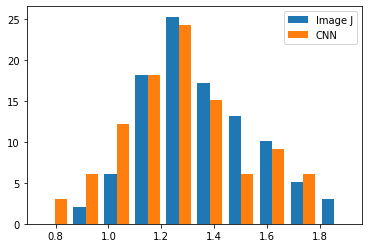

In [28]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

(array([[0.        , 0.02020202, 0.08080808, 0.26262626, 0.51515152,
         0.68686869, 0.81818182, 0.91919192, 0.96969697, 1.        ],
        [0.03030303, 0.09090909, 0.21212121, 0.39393939, 0.63636364,
         0.78787879, 0.84848485, 0.93939394, 1.        , 1.        ]]),
 array([0.73684937, 0.85455697, 0.97226456, 1.08997216, 1.20767975,
        1.32538735, 1.44309495, 1.56080254, 1.67851014, 1.79621773,
        1.91392533]),
 <a list of 2 Lists of Patches objects>)

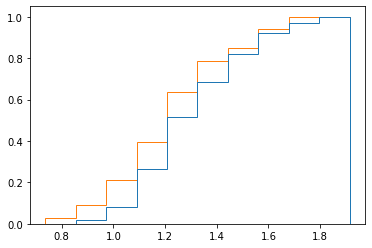

In [29]:
# plt.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,label='Reversed emp.')
plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')

r_squared = 0.9545940903728497


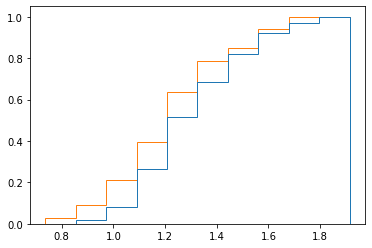

In [30]:
Obj = plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')
Y1, Y2 = Obj[0]
Rsquared = r2_score(Y1, Y2)
print('r_squared =',Rsquared)

In [31]:
#df

In [32]:
# r.history['accuracy']

In [33]:
acc_train = r.history['accuracy'][-1]
acc_test = r.history['val_accuracy'][-1]
loss_train = r.history['loss'][-1]
loss_test = r.history['val_loss'][-1]

In [34]:

df = pd.DataFrame({'N1':N1, 'N2':N2,'R^2':Rsquared,
                   'acc train':acc_train,'acc test':acc_test,
                   'loss train':loss_train,'loss test':loss_test,
                   'Details':Description},
                  index= [0])
Arq = "output.xlsx"
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a list of 2 Lists of Patches objects>
[0.73684937 0.85455697 0.97226456 1.08997216 1.20767975 1.32538735
 1.44309495 1.56080254 1.67851014 1.79621773 1.91392533]
[[ 0.          2.02020202  6.06060606 18.18181818 25.25252525 17.17171717
  13.13131313 10.1010101   5.05050505  3.03030303]
 [ 3.03030303  6.06060606 12.12121212 18.18181818 24.24242424 15.15151515
   6.06060606  9.09090909  6.06060606  0.        ]]


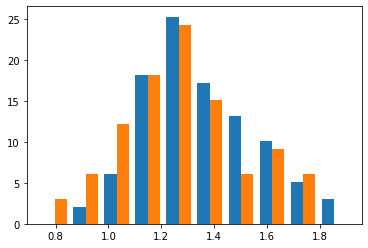

In [35]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [36]:
print(counts.sum())

200.00000000000003


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


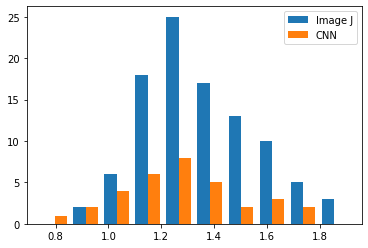

In [37]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [38]:
[Diam1,Diameter_All]

[[1.0136588738827657,
  1.3384498643738487,
  1.2241743928678164,
  1.2810955363139882,
  1.4897169283032898,
  1.3469841688927182,
  1.802936648279376,
  1.1101783096888704,
  1.349345229721172,
  0.9587903583676608,
  1.2539740179716348,
  1.1606409601292735,
  1.3071677279655385,
  1.2396774300177211,
  1.4634168627716928,
  1.369947111730825,
  1.5945718456175375,
  1.2293637946517857,
  1.6281537802488464,
  1.9139253303624628,
  1.3284238815238665,
  1.2236542422631285,
  1.1055812783082735,
  1.2084724894722394,
  1.1396070970426018,
  1.2610615335399848,
  1.4729562736988213,
  1.428191076384995,
  1.2880338220675407,
  1.474252319944901,
  1.697826354277848,
  1.2529582429827641,
  1.034176589165282,
  1.1861406733319428,
  1.3076546595257188,
  1.016167934339702,
  1.607692842495848,
  1.5322707725763225,
  1.6985761120332168,
  1.3690173884396646,
  1.1334454996327699,
  1.5351763407845973,
  1.09458595441189,
  1.6933208363283037,
  1.2711180048559307,
  1.1737313097142148,